In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/45.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/1543498.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/272.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/215.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/143.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/5.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/0487353.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/1388982.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/1014380.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/1204180.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/0487360.jpg
/kaggle/input/split-balanced-classes/split_balanced_data/validation/MD/0524796.jpg
/kaggle/input/split-balance

In [52]:
#imports
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

In [53]:
training_directory_url = "/kaggle/input/split-balanced-classes/split_balanced_data/train"
val_directory_url = "/kaggle/input/split-balanced-classes/split_balanced_data/validation"
test_directory_url = "/kaggle/input/split-balanced-classes/split_balanced_data/test"

In [54]:
Xy_train = image_dataset_from_directory(
    directory= training_directory_url,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1800 files belonging to 9 classes.


In [55]:
Xy_val = image_dataset_from_directory(
    directory= val_directory_url,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 900 files belonging to 9 classes.


In [56]:
Xy_test = image_dataset_from_directory(
    directory= test_directory_url,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False)

Found 900 files belonging to 9 classes.


In [57]:
base_model = EfficientNetV2B0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [58]:
for layer in base_model.layers:
    layer.trainable = False

In [59]:
model = Sequential([
    base_model,
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
Xy_val_preprocessed = Xy_val.map(lambda x, y: (preprocess_input(x), y))

In [63]:
Xy_train_preprocessed = Xy_train.map(lambda x, y: (preprocess_input(x), y))

In [64]:
Xy_test_preprocessed = Xy_test.map(lambda x, y: (preprocess_input(x), y))

In [65]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5,           
    restore_best_weights=True  
)

In [66]:
history = model.fit(
    Xy_train_preprocessed,
    epochs=100,  
    validation_data=Xy_val_preprocessed,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100


2023-09-07 07:53:54.002175: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetv2-b0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


57/57 [==============================] - 28s 304ms/step - loss: 2.2950 - accuracy: 0.1517 - val_loss: 2.0583 - val_accuracy: 0.2433
Epoch 2/100
57/57 [==============================] - 17s 272ms/step - loss: 2.0731 - accuracy: 0.1978 - val_loss: 1.9629 - val_accuracy: 0.2844
Epoch 3/100
57/57 [==============================] - 18s 289ms/step - loss: 1.9168 - accuracy: 0.2717 - val_loss: 1.6916 - val_accuracy: 0.3444
Epoch 4/100
57/57 [==============================] - 17s 269ms/step - loss: 1.6403 - accuracy: 0.3856 - val_loss: 1.3396 - val_accuracy: 0.5289
Epoch 5/100
57/57 [==============================] - 18s 285ms/step - loss: 1.3703 - accuracy: 0.4894 - val_loss: 1.1505 - val_accuracy: 0.5878
Epoch 6/100
57/57 [==============================] - 21s 353ms/step - loss: 1.1345 - accuracy: 0.5861 - val_loss: 1.0483 - val_accuracy: 0.6378
Epoch 7/100
57/57 [==============================] - 17s 274ms/step - loss: 0.8787 - accuracy: 0.6778 - val_loss: 1.0410 - val_accuracy: 0.6933
Epoc

In [67]:
# Evaluate the model on the validation dataset
accuracy = model.evaluate(Xy_val_preprocessed, verbose=1)

# Print the accuracy
print(f"Validation Accuracy: {accuracy[1] * 100:.2f}%")

29/29 [==============================] - 6s 145ms/step - loss: 0.9508 - accuracy: 0.7644
Validation Accuracy: 76.44%


In [68]:
import matplotlib.pyplot as plt

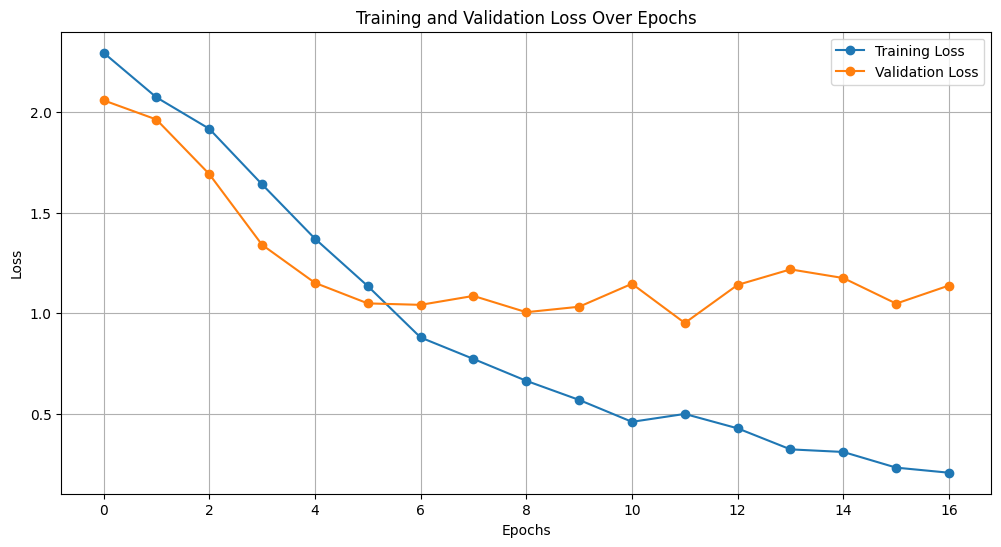

In [69]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
#prediction
y_pred_encoded = model.predict(Xy_test_preprocessed)

29/29 [==============================] - 7s 154ms/step


In [71]:
y_pred_class_num = np.argmax(y_pred_encoded, axis=1)

In [72]:
y_pred_true_labels = np.argmax(Xy_test_preprocessed.map(lambda x, y: y).as_numpy_iterator().next(), axis=1)

In [73]:
y_pred_true_labels

array([1, 7, 8, 3, 2, 2, 8, 0, 1, 4, 2, 6, 6, 5, 4, 3, 1, 6, 6, 4, 1, 6,
       8, 5, 8, 7, 5, 1, 7, 4, 4, 2])